# Percentage of Immigration by neighborhood

Code to generate a dataset with the percentage of residents of Barcelona's neighborhoods that have been born outside of Spain.

Data from 2025:

In [6]:
# import libraries
import pandas as pd
import geopandas as gpd
from shapely import wkt
import matplotlib.pyplot as plt
# read csv
path_barris = '../data_original/Codigo_valores/BarcelonaCiutat_Barris.csv'
df = pd.read_csv(path_barris)

# read csv from immigrant data
path_immigrant = '../data/merged_data/merged_birthPlace_spain_v_outside.csv'
df_immigrant = pd.read_csv(path_immigrant)
df_immigrant['Value'] = pd.to_numeric(df_immigrant['Value'], errors='coerce').fillna(0).astype(int)
df_immigrant['Birth_Place'] = df_immigrant['Birth_Place'].astype(str).str.strip()
# get data from 2025 only
df_immigrant_2025 = df_immigrant[df_immigrant['Year_Reference'] == 2025]

# total population by neighborhood
total = df_immigrant_2025.groupby(['District', 'Neighborhood'], as_index=False)['Value'].sum().rename(columns={'Value':'total_population'})

# population from Rest of European Union and Rest of World
eu = df_immigrant_2025[df_immigrant_2025['Birth_Place'] == 'Rest of European Union'].groupby(['District','Neighborhood'], as_index=False)['Value'].sum().rename(columns={'Value':'eu_population'})
world = df_immigrant_2025[df_immigrant_2025['Birth_Place'] == 'Rest of World'].groupby(['District','Neighborhood'], as_index=False)['Value'].sum().rename(columns={'Value':'world_population'})

# combine
summary = total.merge(eu, on=['District','Neighborhood'], how='left').merge(world, on=['District','Neighborhood'], how='left').fillna(0)
summary['outside_spain'] = summary['eu_population'] + summary['world_population']
# Calculate population from Spain
summary['spain_population'] = summary['total_population'] - summary['outside_spain']
# reorder columns
summary = summary[['District', 'Neighborhood', 'total_population', 'spain_population', 'outside_spain', 'eu_population', 'world_population']]
# Percentage of population from outside Spain
summary['pct_outside_spain'] = (summary['outside_spain'] / summary['total_population'] * 100).round(2)


# save and inspect
summary.to_csv('../data/processed/neighborhood_population_summary_2025.csv', index=False)
print(summary.head())



       District                           Neighborhood  total_population  \
0  Ciutat Vella  Sant Pere, Santa Caterina i la Ribera             22755   
1  Ciutat Vella                         el Barri Gòtic             27863   
2  Ciutat Vella                               el Raval             49889   
3  Ciutat Vella                         la Barceloneta             14741   
4      Eixample                            Sant Antoni             39207   

   spain_population  outside_spain  eu_population  world_population  \
0              9273          13482           3384             10098   
1              6765          21098           2556             18542   
2             17183          32706           3848             28858   
3              6803           7938           2056              5882   
4             24197          15010           2585             12425   

   pct_outside_spain  
0              59.25  
1              75.72  
2              65.56  
3              53.85  
4

Generate map:

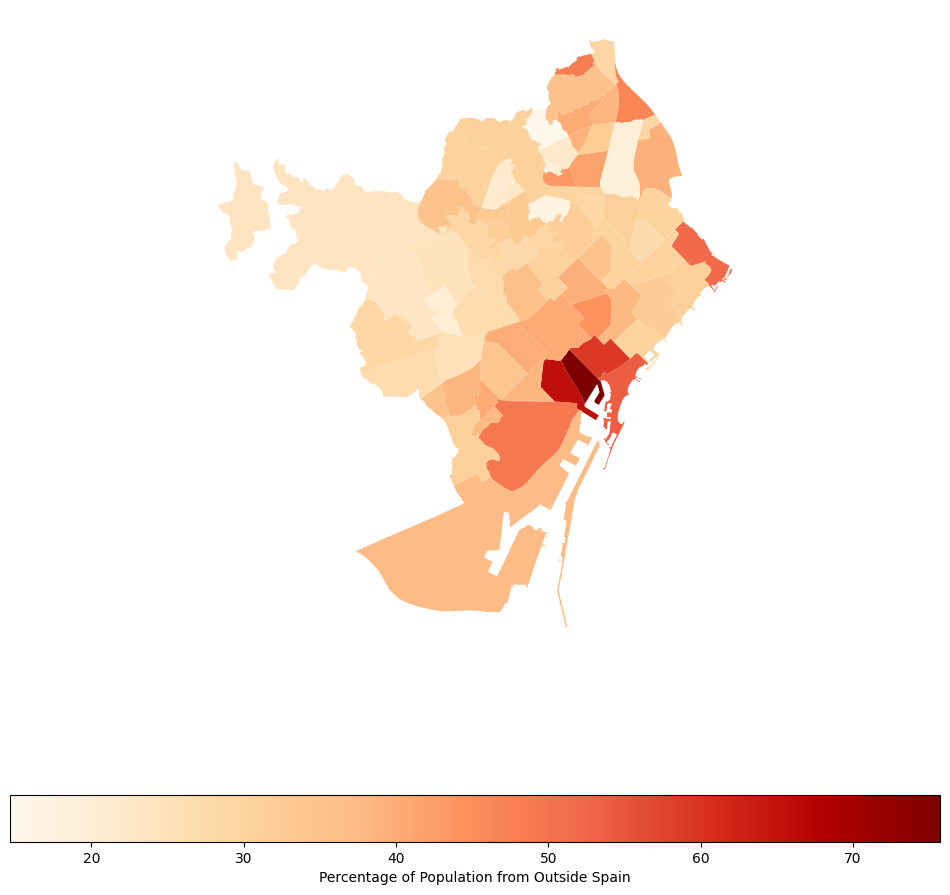

In [7]:
# convert WKT strings to geometry objects
df["geometria_etrs89"] = df["geometria_etrs89"].apply(wkt.loads)   
# create GeoDataFrame and set the correct ETRS89 CRS
# EPSG:25831 for ETRS89 
gdf = gpd.GeoDataFrame(df, geometry="geometria_etrs89", crs="EPSG:25831")
# merge with summary data
gdf_summary = gdf.merge(summary, left_on=['nom_districte', 'nom_barri'], right_on=['District', 'Neighborhood'], how='left')
# plot percentage of population from outside Spain
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
gdf_summary.plot(column='pct_outside_spain', ax=ax, legend=True, cmap='OrRd', 
                 legend_kwds={'label': "Percentage of Population from Outside Spain", 'orientation': "horizontal"})
ax.axis('off')
plt.show()

Data from 2015:

In [8]:
# read csv
path_barris = '../data_original/Codigo_valores/BarcelonaCiutat_Barris.csv'
df = pd.read_csv(path_barris)

# read csv from immigrant data
path_immigrant = '../data/merged_data/merged_birthPlace_spain_v_outside.csv'
df_immigrant = pd.read_csv(path_immigrant)
df_immigrant['Value'] = pd.to_numeric(df_immigrant['Value'], errors='coerce').fillna(0).astype(int)
df_immigrant['Birth_Place'] = df_immigrant['Birth_Place'].astype(str).str.strip()
# get data from 2015 only
df_immigrant_2015 = df_immigrant[df_immigrant['Year_Reference'] == 2015]

# total population by neighborhood
total = df_immigrant_2015.groupby(['District', 'Neighborhood'], as_index=False)['Value'].sum().rename(columns={'Value':'total_population'})

# population from Rest of European Union and Rest of World
eu = df_immigrant_2015[df_immigrant_2015['Birth_Place'] == 'Rest of European Union'].groupby(['District','Neighborhood'], as_index=False)['Value'].sum().rename(columns={'Value':'eu_population'})
world = df_immigrant_2015[df_immigrant_2015['Birth_Place'] == 'Rest of World'].groupby(['District','Neighborhood'], as_index=False)['Value'].sum().rename(columns={'Value':'world_population'})

# combine
summary = total.merge(eu, on=['District','Neighborhood'], how='left').merge(world, on=['District','Neighborhood'], how='left').fillna(0)
summary['outside_spain'] = summary['eu_population'] + summary['world_population']
# Calculate population from Spain
summary['spain_population'] = summary['total_population'] - summary['outside_spain']
# reorder columns
summary = summary[['District', 'Neighborhood', 'total_population', 'spain_population', 'outside_spain', 'eu_population', 'world_population']]
# Percentage of population from outside Spain
summary['pct_outside_spain'] = (summary['outside_spain'] / summary['total_population'] * 100).round(2)


# save and inspect
summary.to_csv('../data/processed/neighborhood_population_summary_2015.csv', index=False)
print(summary.head())


       District                           Neighborhood  total_population  \
0  Ciutat Vella  Sant Pere, Santa Caterina i la Ribera             22456   
1  Ciutat Vella                         el Barri Gòtic             15508   
2  Ciutat Vella                               el Raval             47135   
3  Ciutat Vella                         la Barceloneta             15036   
4      Eixample                            Sant Antoni             38016   

   spain_population  outside_spain  eu_population  world_population  \
0             12164          10292           3402              6890   
1              7986           7522           2587              4935   
2             20679          26456           3779             22677   
3              9561           5475           1895              3580   
4             28226           9790           2285              7505   

   pct_outside_spain  
0              45.83  
1              48.50  
2              56.13  
3              36.41  
4

Generate the map:

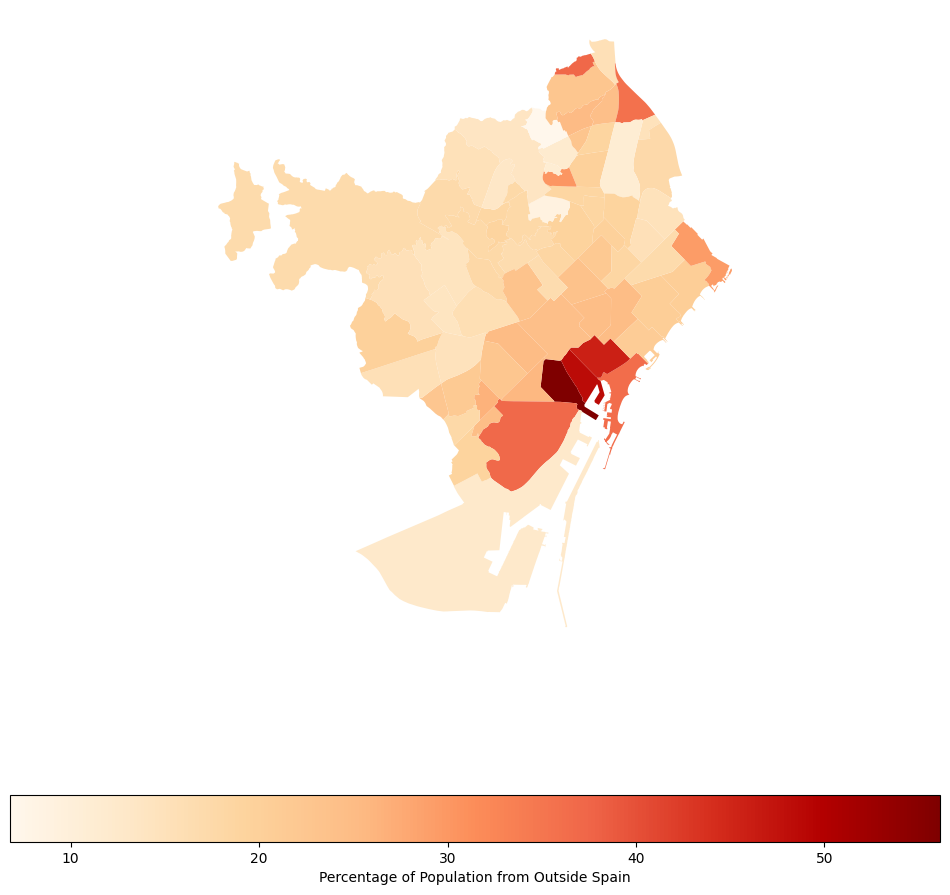

In [9]:
# convert WKT strings to geometry objects
df["geometria_etrs89"] = df["geometria_etrs89"].apply(wkt.loads)   # or gpd.GeoSeries.from_wkt(df["geometry"])
# create GeoDataFrame and set the correct ETRS89 CRS

# EPSG:25831 for ETRS89 
gdf = gpd.GeoDataFrame(df, geometry="geometria_etrs89", crs="EPSG:25831")
# merge with summary data
gdf_summary = gdf.merge(summary, left_on=['nom_districte', 'nom_barri'], right_on=['District', 'Neighborhood'], how='left')
# plot percentage of population from outside Spain
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
gdf_summary.plot(column='pct_outside_spain', ax=ax, legend=True, cmap='OrRd', 
                 legend_kwds={'label': "Percentage of Population from Outside Spain", 'orientation': "horizontal"})

ax.axis('off')
plt.show()

GIF

In [10]:
# Retrieve total population and immigration from outside Spain by neighborhood in Barcelona for every year
import pandas as pd
# read csv
path = '../data/merged_data/merged_birthPlace_spain_v_outside.csv'
df = pd.read_csv(path)
df['Value'] = pd.to_numeric(df['Value'], errors='coerce').fillna(0).astype(int)
df['Birth_Place'] = df['Birth_Place'].astype(str).str.strip()
years = df['Year_Reference'].unique()

# total population by neighborhood
total = df.groupby(['Year_Reference', 'District', 'Neighborhood'], as_index=False)['Value'].sum().rename(columns={'Value':'total_population'})

# population from Rest of European Union and Rest of World
eu = df[df['Birth_Place'] == 'Rest of European Union'].groupby(['Year_Reference', 'District','Neighborhood'], as_index=False)['Value'].sum().rename(columns={'Value':'eu_population'})
world = df[df['Birth_Place'] == 'Rest of World'].groupby(['Year_Reference', 'District','Neighborhood'], as_index=False)['Value'].sum().rename(columns={'Value':'world_population'})

# combine
summary = total.merge(eu, on=['Year_Reference', 'District','Neighborhood'], how='left').merge(world, on=['Year_Reference', 'District','Neighborhood'], how='left').fillna(0)
summary['outside_spain'] = summary['eu_population'] + summary['world_population']
# Calculate population from Spain
summary['spain_population'] = summary['total_population'] - summary['outside_spain']
# reorder columns with Year_Reference first and sort by year
summary = summary[['Year_Reference', 'District', 'Neighborhood', 'total_population', 'spain_population', 'outside_spain', 'eu_population', 'world_population']]
summary = summary.sort_values('Year_Reference')
# Percentage of population from outside Spain
summary['pct_outside_spain'] = (summary['outside_spain'] / summary['total_population'] * 100).round(2)


# save and inspect
summary.to_csv('../data/processed/neighborhood_population_summary.csv', index=False)
print(summary.head())



    Year_Reference      District  \
0             1997  Ciutat Vella   
52            1997    Sant Martí   
51            1997    Sant Martí   
50            1997    Sant Martí   
49            1997    Sant Martí   

                                    Neighborhood  total_population  \
0          Sant Pere, Santa Caterina i la Ribera             19830   
52                         el Besòs i el Maresme             21495   
51                      Sant Martí de Provençals             27279   
50                       Provençals del Poblenou             16809   
49  Diagonal Mar i el Front Marítim del Poblenou              4127   

    spain_population  outside_spain  eu_population  world_population  \
0              17968           1862            295              1567   
52             21150            345             86               259   
51             26911            368             79               289   
50             16503            306             54               252   
49

In [11]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
from shapely import wkt

# prepare geodataframe once
path_barris = '../data_original/Codigo_valores/BarcelonaCiutat_Barris.csv'
df_barris = pd.read_csv(path_barris)
df_barris["geometria_etrs89"] = df_barris["geometria_etrs89"].apply(wkt.loads)
gdf_barris = gpd.GeoDataFrame(df_barris, geometry="geometria_etrs89", crs="EPSG:25831")

# ensure Value numeric and Birth_Place normalized
df_immigrant = pd.read_csv('../data/merged_data/merged_birthPlace_spain_v_outside.csv')
df_immigrant['Value'] = pd.to_numeric(df_immigrant['Value'], errors='coerce').fillna(0).astype(int)
df_immigrant['Birth_Place'] = df_immigrant['Birth_Place'].astype(str).str.strip()

years = sorted(df_immigrant['Year_Reference'].unique())

# optional: compute global vmax for consistent color scale across years
def compute_pct_df(df_year):
    total = df_year.groupby(['District','Neighborhood'])['Value'].sum()
    eu = df_year[df_year['Birth_Place']=='Rest of European Union'].groupby(['District','Neighborhood'])['Value'].sum()
    world = df_year[df_year['Birth_Place']=='Rest of World'].groupby(['District','Neighborhood'])['Value'].sum()
    summary = (pd.concat([total, eu, world], axis=1)
                 .rename(columns={0:'total_population', 'Value':'ignore'})
                 .fillna(0))
    summary.columns = ['total_population','eu_population','world_population'] if summary.shape[1]==3 else summary.columns
    # safer explicit rebuild:
    summary = total.reset_index(name='total_population') \
             .merge(eu.reset_index(name='eu_population'), on=['District','Neighborhood'], how='left') \
             .merge(world.reset_index(name='world_population'), on=['District','Neighborhood'], how='left') \
             .fillna(0)
    summary['outside_spain'] = summary['eu_population'] + summary['world_population']
    summary['pct_outside_spain'] = (summary['outside_spain'] / summary['total_population'] * 100).replace([np.inf, -np.inf], 0).fillna(0)
    return summary.reset_index(drop=True)

import numpy as np
# compute global vmax
all_pcts = []
for y in years:
    dfy = df_immigrant[df_immigrant['Year_Reference']==y]
    all_pcts.append(compute_pct_df(dfy)['pct_outside_spain'].max())
global_vmax = max(all_pcts) if all_pcts else 1

cmap = plt.cm.OrRd
norm = mpl.colors.Normalize(vmin=0, vmax=global_vmax)

for year in years:
    dfy = df_immigrant[df_immigrant['Year_Reference']==year]
    summary = compute_pct_df(dfy)
    gdf_summary = gdf_barris.merge(summary, left_on=['nom_districte','nom_barri'],
                                   right_on=['District','Neighborhood'], how='left')
    fig, ax = plt.subplots(1,1, figsize=(12,12))
    gdf_summary.plot(column='pct_outside_spain', ax=ax, cmap=cmap, norm=norm,
                     missing_kwds={'color':'lightgrey'}, linewidth=0.2, edgecolor='gray')

    # small label in corner with year
    ax.text(0.01, 0.99, f'Year: {int(year)}', transform=ax.transAxes,
            fontsize=12, va='top', ha='left', bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))
    # colorbar
    sm = mpl.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm._A = []
    cbar = fig.colorbar(sm, ax=ax, orientation='horizontal', fraction=0.04, pad=0.02)
    cbar.set_label('Percentage of Population from Outside Spain (%)')
    ax.axis('off')
    plt.tight_layout()
    # ensure output folder exists and save figure
    import os
    out_dir = '../data/outputs'
    os.makedirs(out_dir, exist_ok=True)
    png_path = os.path.join(out_dir, f'pct_outside_spain_{int(year)}.png')
    fig.savefig(png_path, dpi=150, bbox_inches='tight')
    plt.close(fig)
    
# create gif from saved PNGs (1997-2025)
import imageio
import glob
pngs = sorted(glob.glob(os.path.join(out_dir, 'pct_outside_spain_*.png')))
# order by year in filename to be safe
pngs = sorted(pngs, key=lambda p: int(os.path.splitext(os.path.basename(p))[0].split('_')[-1]))
images = []
for p in pngs:
    images.append(imageio.v2.imread(p))
gif_path = os.path.join(out_dir, 'pct_outside_spain_1997_2025.gif')
# duration: seconds per frame (adjust to taste)
imageio.mimsave(gif_path, images, duration=0.6)
print("GIF saved to", gif_path)

GIF saved to ../data/outputs/pct_outside_spain_1997_2025.gif
